<a href="https://colab.research.google.com/github/JuanMr7/Angular---login/blob/main/DEBER_1_U4(ANN_Regresi%C3%B3n_Lineal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/1729
35/35 [==============================] - 2s 8ms/step - loss: 53142769664.0000 - val_loss: 56364511232.0000
Epoch 2/1729
35/35 [==============================] - 0s 3ms/step - loss: 53138903040.0000 - val_loss: 56357953536.0000
Epoch 3/1729
35/35 [==============================] - 0s 3ms/step - loss: 53127696384.0000 - val_loss: 56340164608.0000
Epoch 4/1729
35/35 [==============================] - 0s 3ms/step - loss: 53100191744.0000 - val_loss: 56300216320.0000
Epoch 5/1729
35/35 [==============================] - 0s 3ms/step - loss: 53047668736.0000 - val_loss: 56225570816.0000
Epoch 6/1729
35/35 [==============================] - 0s 3ms/step - loss: 52947148800.0000 - val_loss: 56100638720.0000
Epoch 7/1729
35/35 [==============================] - 0s 3ms/step - loss: 52794834944.0000 - val_loss: 55913934848.0000
Epoch 8/1729
35/35 [==============================] - 0s 3ms/step - loss: 52581244928.0000 - val_loss: 55653613568.0000
Epoch 9/1729
35/35 [====================

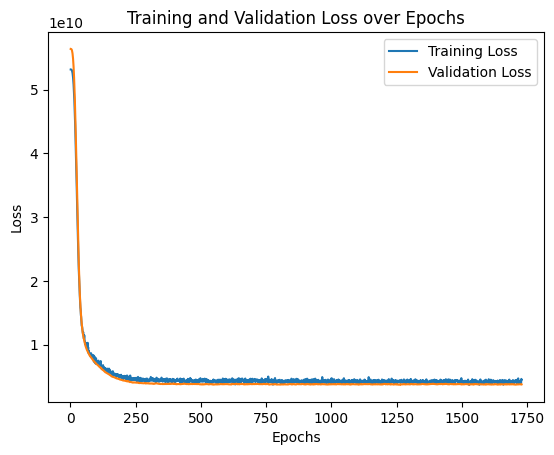

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv("SaratogaHouses.csv")

# Convertir las variables categóricas a valores numéricos con LabelEncoder
label_columns = ["heating", "fuel", "sewer", "waterfront", "newConstruction", "centralAir"]
label_encoder = LabelEncoder()

for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop("price", axis=1)
y = df["price"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la Red Neuronal Artificial (ANN)
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo y obtener el historial de entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=1729, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Visualizar la pérdida durante el entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
